# EN3160 Assignment 1 on Intensity Transformations and Neighborhood Filtering #


## Implement the intensity transformation  ##



(-0.5, 719.5, 809.5, -0.5)

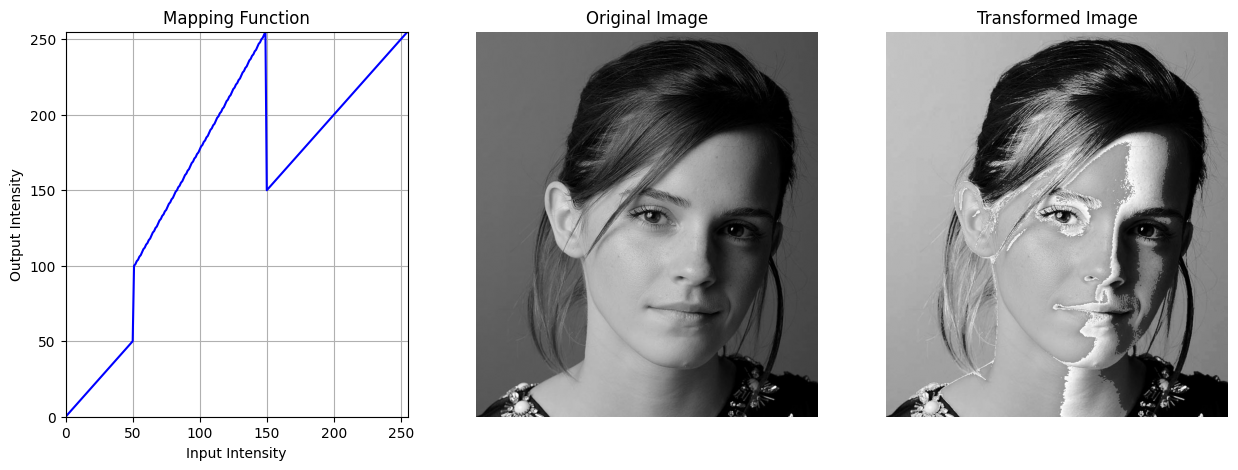

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define breakpoints and mappings
# Each tuple: (input_intensity, output_intensity)
cp_emma = np.array([
    (0, 0),
    (50, 50),
    (51, 100),
    (149, 255),
    (150, 150),
    (255, 255)
], dtype=np.float32)

# Create LUT
LUT = np.zeros(256, dtype=np.uint8)

def linear_transform(control_points,lut ):
    for i in range(len(control_points) - 1):
        x1, y1 = control_points[i]
        x2, y2 = control_points[i + 1]
        slope = (y2 - y1) / (x2 - x1)
        for x in range(int(x1), int(x2) + 1):
            lut[x] = np.clip(slope * (x - x1) + y1, 0, 255)
    return lut
            
LUT = linear_transform(cp_emma, LUT)
# Read image in grayscale
img_orig = cv2.imread('a1images/emma.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(LUT, color='blue')
plt.title('Mapping Function')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid()
plt.xlim(0, 255)
plt.ylim(0, 255)

plt.subplot(132)
plt.imshow(img_orig, cmap='gray')
plt.title('Original Image')
plt.axis('off')

img_transformed = cv2.LUT(img_orig, LUT)
plt.subplot(133)
plt.imshow(img_transformed, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')




##  Brain Proton Density Image ##


### White Matter ###


<function matplotlib.pyplot.show(close=None, block=None)>

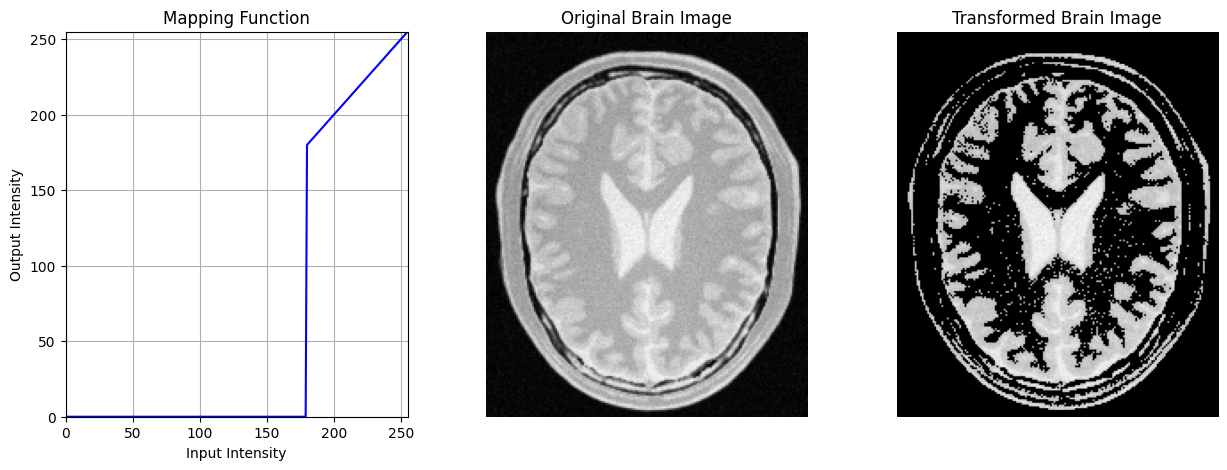

In [ ]:
cp_wm = np.array([
    (0,0),
    (179,0),
    (180,180),
    (255,255)
])

wm_lut = np.zeros(256, dtype=np.uint8)

wm_lut = linear_transform(cp_wm, wm_lut)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(wm_lut, color='blue')
plt.title('Mapping Function')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid()
plt.xlim(0, 255)
plt.ylim(0, 255)



img_brain = cv2.imread('a1images/brain_proton_density_slice.png', cv2.IMREAD_GRAYSCALE)

plt.subplot(132)
plt.imshow(img_brain, cmap='gray')
plt.title('Original Brain Image')
plt.axis('off')

img_brain_transformed_WM = cv2.LUT(img_brain, w_lut)

plt.subplot(133)
plt.imshow(img_brain_transformed_WM, cmap='gray')
plt.title('Transformed Brain Image')
plt.axis('off')

plt.show

### Gray Matter


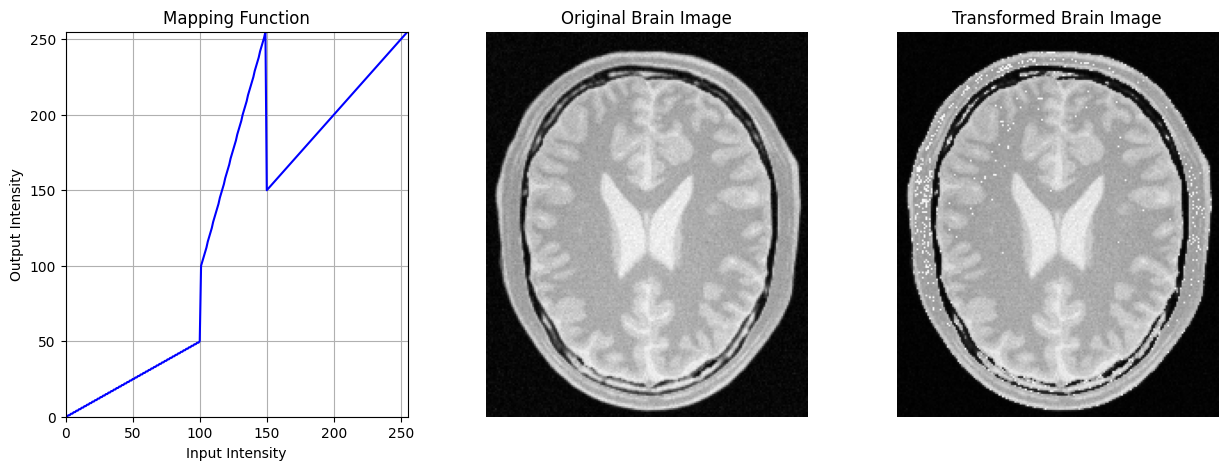

In [74]:
cp_gm = np.array([
   (0, 0),
    (100, 50),
    (101, 100),
    (149, 255),
    (150, 150),
    (255, 255)
], )

   
gm_lut = np.zeros(256, dtype=np.uint8) 
gm_lut = linear_transform(cp_gm, gm_lut)
img_brain_transformed_GM = cv2.LUT(img_brain, gm_lut)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(gm_lut, color='blue')
plt.title('Mapping Function')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid()
plt.xlim(0, 255)
plt.ylim(0, 255)


plt.subplot(132)

plt.imshow(img_brain, cmap='gray')
plt.title('Original Brain Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(img_brain_transformed_GM, cmap='gray')
plt.title('Transformed Brain Image')
plt.axis('off')

plt.show()

